In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("car_data.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


From the above output we know that the dataset consists of 9 columns amongst which 3 have int datatype, 2 have float data type and rest have object datatype i.e. categorical data

In [31]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


From the above function we know the concentration of data and its statistical position 

Q1. From which manufacturing year to which manufacturing year vehicles are present in this data ?

Ans: The dataset contains data from manufacturing year 2003 to 2018.

In [32]:
print("From ", df["Year"].min(), " to ", df["Year"].max())

From  2003  to  2018


Q2. What is the lowest price to which a vehicle is sold ?

Ans: The lowest price to which a vehicle was sold is 0.1.

In [33]:
print("Lowest price: ", df["Selling_Price"].min())

Lowest price:  0.1


Q3. What is the highest price to which a vehicle is sold ?

Ans: The highest price to which a vehicle was sold is 35.0.

In [34]:
print("Highest price: ", df["Selling_Price"].max())

Highest price:  35.0


Q4. How many records are there in this data ?

Ans: There are 301 total records in the data ranging from index 0 to 300.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Q5. Are there any missing records in this data?

Ans: There are no missing records present in this data.

In [36]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Q6. How many different vehicles are present in this data?

Ans: The data consists of information about 98 different types of vehicles.

In [37]:
df["Car_Name"].describe()

count      301
unique      98
top       city
freq        26
Name: Car_Name, dtype: object

Q7. Which is the most sold vehicle in this data?

Ans: The most sold vehicle in this data is 'city'.

In [38]:
df["Car_Name"].mode()

0    city
Name: Car_Name, dtype: object

Q8. Does the database include any CNG vehicle ? If yes how many of them are there ?

Ans: Yes, the database includes 2 CNG vehicles.

In [39]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Q9. How many vehicles here are for sell from Individuals directly ?

Ans: There are 106 vehicles which are directly being sold by individuals.

In [40]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

Q10. Does this database contain auto transmission vehicles ? If yes how many of them are there ?

Ans: Yes, this database contains 40 auto transmission vehicles.

In [41]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

Q11. How many single person owned vehicles are there in this database ?

Ans: There are 290 vehicles are owned by single person.

In [42]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

Q12. Which is the most and least cost depreciated vehicle in data ?

Ans: Least price depricated vehicle in the data- Land Cruiser
     Most price depricated vehicle in the data- Honda Activa 4G

In [43]:
df["Depreciation"] = df["Present_Price"] - df["Selling_Price"]
most_depreciated = df.loc[df["Depreciation"].idxmax(), ["Car_Name", "Depreciation"]]
least_depreciated = df.loc[df["Depreciation"].idxmin(), ["Car_Name", "Depreciation"]]

most_depreciated, least_depreciated

(Car_Name        land cruiser
 Depreciation            57.6
 Name: 86, dtype: object,
 Car_Name        Honda Activa 4G
 Depreciation               0.03
 Name: 155, dtype: object)

Q13. Which brands of vehicles are less affected by cost depreciation ?

Ans: The 2 brands least affected by cost deprication are UM and Activa.

In [44]:
# Extract brand names (assuming the first word in Car_Name is the brand)
df["Brand"] = df["Car_Name"].apply(lambda x: x.split()[0])

# Calculate average depreciation per brand
brand_depreciation = df.groupby("Brand")["Depreciation"].mean().sort_values()

# Brands with the least depreciation
least_depreciated_brands = brand_depreciation.head(5)
least_depreciated_brands

Brand
UM          0.120000
Activa      0.183333
TVS         0.242750
Mahindra    0.250000
Yamaha      0.258750
Name: Depreciation, dtype: float64

Q14. Are there any factors which you feel affect the cost depreciation?

Ans: The factors which affect cost deprication are 

In [45]:
correlation_factors = ["Year", "Kms_Driven", "Depreciation", "Owner"]
correlation_matrix = df[correlation_factors].corr()

correlation_matrix

,Year,Kms_Driven,Depreciation,Owner
Year,1.000000,-0.524342,-0.333746,-0.182104
Kms_Driven,-0.524342,1.000000,0.333832,0.089216
Depreciation,-0.333746,0.333832,1.000000,0.107415
Owner,-0.182104,0.089216,0.107415,1.000000


Q15. In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?

Ans: Yes, the selling price is affected by the age of the vehicle as the graph shows a descent in the selling price and the correlation table depicts a weak negative correlation.
However, no trend is observed between the distance driven by the car and its selling price, and very little correlation is observed. Hence, we can say that the selling price is not affected by the distance driven by the vehicle.

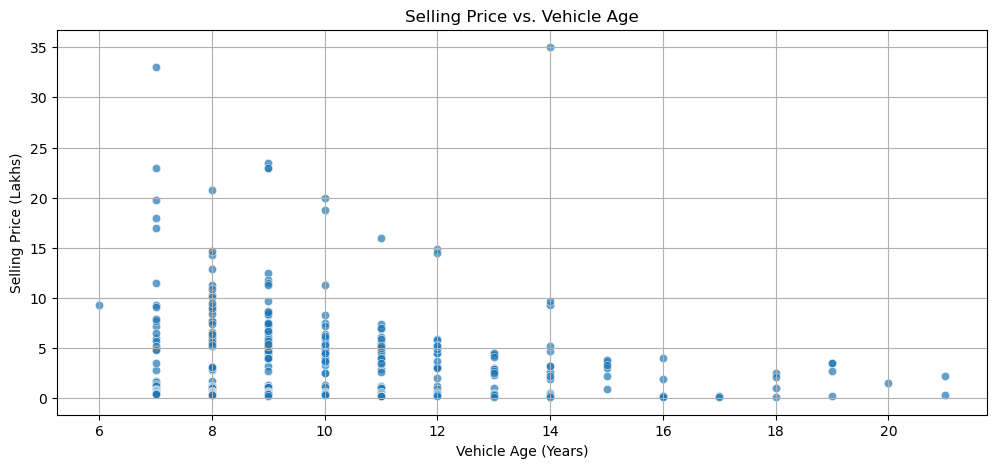

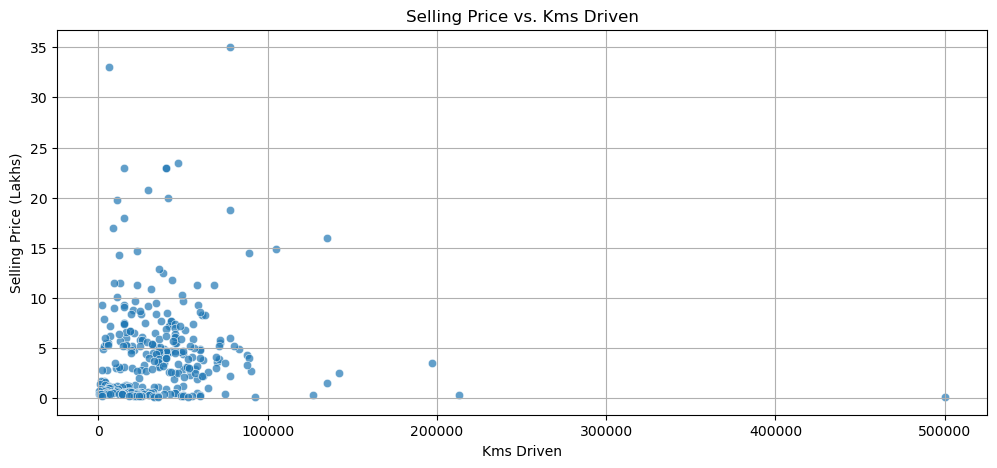

,Selling_Price,Vehicle_Age,Kms_Driven
Selling_Price,1.000000,-0.236141,0.029187
Vehicle_Age,-0.236141,1.000000,0.524342
Kms_Driven,0.029187,0.524342,1.000000


In [7]:
# Calculate vehicle age
df["Vehicle_Age"] = 2024 - df["Year"]

# Scatter plot: Selling Price vs. Vehicle Age
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["Vehicle_Age"], y=df["Selling_Price"], alpha=0.7)
plt.xlabel("Vehicle Age (Years)")
plt.ylabel("Selling Price (Lakhs)")
plt.title("Selling Price vs. Vehicle Age")
plt.grid(True)
plt.show()

# Scatter plot: Selling Price vs. Kms Driven
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["Kms_Driven"], y=df["Selling_Price"], alpha=0.7)
plt.xlabel("Kms Driven")
plt.ylabel("Selling Price (Lakhs)")
plt.title("Selling Price vs. Kms Driven")
plt.grid(True)
plt.show()

# Compute correlation values
correlations = df[["Selling_Price", "Vehicle_Age", "Kms_Driven"]].corr()
correlations

Q16. Can we get idea about newest vehicles i.e. after 2014 manufactured ?

Ans: The new vehicles are mostly sold within the price range 1-10 lakhs, however some high end vehicles are sold for better prices.
Diesel and Petrol cars dominate the market, with very few CNG options.
Average Selling Price: ₹5.77 Lakhs.
Average Kms Driven: ~22,000 km.
Most cars are between 6-9 years old (2015-2018 models).
Most newer cars have had only 0-1 previous owners.

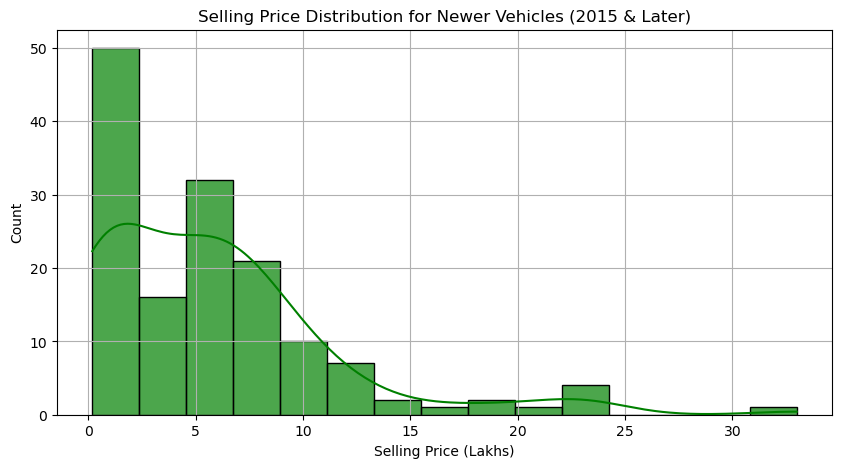

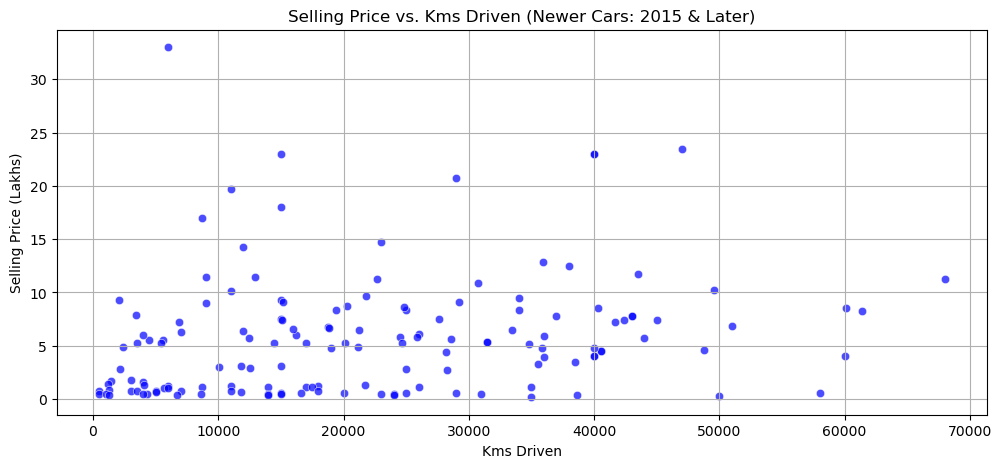

C:\Users\Arya\AppData\Local\Temp\ipykernel_50688\1408258291.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_cars["Fuel_Type"], palette="pastel")


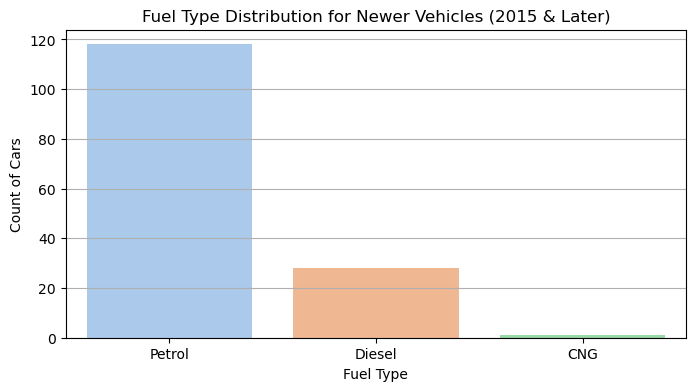

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,2015.836735,5.774014,7.358980,22073.414966,0.013605,8.163265
std,0.811230,5.637325,6.992877,15512.249461,0.116242,0.811230
min,2015.000000,0.180000,0.320000,500.000000,0.000000,6.000000
25%,2015.000000,1.105000,1.470000,9005.000000,0.000000,8.000000
50%,2016.000000,5.250000,6.100000,19000.000000,0.000000,8.000000
75%,2016.000000,7.825000,9.970000,34398.500000,0.000000,9.000000
max,2018.000000,33.000000,36.230000,68000.000000,1.000000,9.000000


In [8]:
# Filter dataset for newer vehicles (manufactured after 2014)
new_cars = df[df["Year"] > 2014]

# Plot Selling Price Distribution for Newer Cars
plt.figure(figsize=(10, 5))
sns.histplot(new_cars["Selling_Price"], bins=15, kde=True, color="green", alpha=0.7)
plt.xlabel("Selling Price (Lakhs)")
plt.ylabel("Count")
plt.title("Selling Price Distribution for Newer Vehicles (2015 & Later)")
plt.grid(True)
plt.show()

# Scatter plot: Selling Price vs. Kms Driven for Newer Cars
plt.figure(figsize=(12, 5))
sns.scatterplot(x=new_cars["Kms_Driven"], y=new_cars["Selling_Price"], alpha=0.7, color="blue")
plt.xlabel("Kms Driven")
plt.ylabel("Selling Price (Lakhs)")
plt.title("Selling Price vs. Kms Driven (Newer Cars: 2015 & Later)")
plt.grid(True)
plt.show()

# Count of cars by fuel type for newer vehicles
plt.figure(figsize=(8, 4))
sns.countplot(x=new_cars["Fuel_Type"], palette="pastel")
plt.xlabel("Fuel Type")
plt.ylabel("Count of Cars")
plt.title("Fuel Type Distribution for Newer Vehicles (2015 & Later)")
plt.grid(axis="y")
plt.show()

# Summary statistics for newer cars
new_cars.describe()


Q17. Can we find out data of only two wheelers from this data ?


Ans: Yes, we will filter the data based on price range (in this case, let's consider vehicles with a selling price < 3.5 as bikes) and then remove the exceptions by manual analysis.

In [10]:
#Check out two wheelers from data of vehicles
two_wheelers = df[df["Present_Price"] < 3.5]
two_wheelers.reset_index(drop = True, inplace = True)
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0,10
1,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,21
2,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0,12
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,8
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,7


In [11]:
#remove the exceptions
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "alto k10"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "800"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "omni"]
two_wheelers.reset_index(drop = True, inplace = True)
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,8
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,7
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,7
3,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,7
4,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,7


Q18. Which is the oldest bike sold here?

Ans: The oldest bike sold here is Hero Super Splendor manufactured in the year 2005.

In [12]:
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
89,Hero Super Splendor,2005,0.2,0.57,55000,Petrol,Individual,Manual,0,19


Q19. Which is the newest bike sold here?

Ans: The newest bikes sold here consist of brands Bajaj, Royal Enfield, Honda, Yamaha and TVS.

In [14]:
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,7
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,7
3,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,7
4,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,7
9,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0,7
26,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0,7
28,Honda CB Hornet 160R,2017,0.80,0.87,3000,Petrol,Individual,Manual,0,7
29,Yamaha FZ S V 2.0,2017,0.78,0.84,5000,Petrol,Individual,Manual,0,7
30,Honda CB Hornet 160R,2017,0.75,0.87,11000,Petrol,Individual,Manual,0,7
32,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0,7


Q20. Which is the most sold bike here?

Ans: The most sold bike here is Royal Enfield Classic 350.

In [15]:
two_wheelers['Car_Name'].value_counts()

Car_Name
Royal Enfield Classic 350    7
Bajaj Pulsar 150             4
Royal Enfield Thunder 350    4
Bajaj Pulsar NS 200          3
TVS Apache RTR 160           3
                            ..
TVS Sport                    1
Honda Dream Yuga             1
Bajaj Avenger Street 220     1
Honda CB Trigger             1
Bajaj  ct 100                1
Name: count, Length: 61, dtype: int64

Q21. Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?

Ans: Yes there are 3 vehicles which have exceptionally good deals. A few of the reasons may include them being the newest models with recent manufacturing years as well as relatively less usage in terms of distance driven.

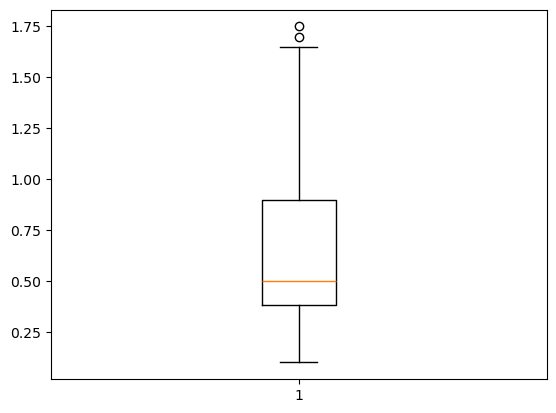

In [16]:
plt.boxplot(two_wheelers.Selling_Price)
plt.show()

In [17]:
two_wheelers[two_wheelers.Selling_Price > 1.6]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,8
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,7
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,7


Q22. Can we find out data of only cars from this data ?

Ans: Yes, We will filter the cars based on selling price greater than 2.0 and manually remove exceptions if any.

In [19]:
cars = df[df["Present_Price"] > 2.0]
cars.reset_index(drop = True, inplace = True)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [21]:
cars = cars.loc[cars.Car_Name != "KTM RC390"]
cars = cars.loc[cars.Car_Name != "Hyosung GT250R"]
cars = cars.loc[cars.Car_Name != "KTM 390 Duke"]
cars = cars.loc[cars.Car_Name != "KTM 390 Duke "]
cars.reset_index(drop = True, inplace = True)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


Q23. Which is the oldest car sold here?

Ans: The oldest cars sold here are 800 and sx4 both manufactured in the year 2003.

In [22]:
cars.loc[cars['Year'] == cars['Year'].min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,21
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0,21


Q24. Which is the newest car sold here?

Ans: The newest car sold here is vitara brezza manufactured in the year 2018

In [23]:
cars.loc[cars['Year'] == cars['Year'].max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,6


Q25. Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

Ans: There are multiple cars with exceptional deals however the reason doesn't appear to be too specific. Most of the cars were sold in the range below 10 lacs. So any luxury car deal above this range seems to be a deal that exceeds expectations which is however it is also not a valid explanation because luxury cars have high prices for obvious measures.

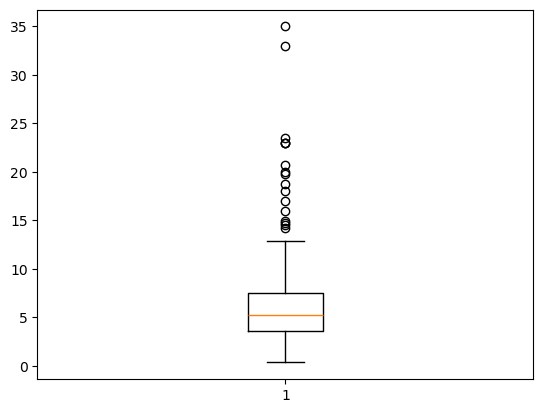

In [24]:
plt.boxplot(cars.Selling_Price)
plt.show()

In [27]:
cars[cars['Selling_Price'] > 12]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0,12
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,9
52,innova,2017,18.00,19.77,15000,Diesel,Dealer,Automatic,0,7
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0,11
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0,10
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0,10
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0,9
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0,7
66,innova,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0,7
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0,8


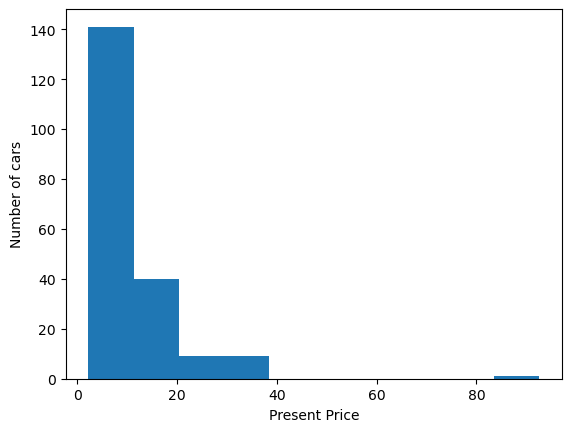

<Axes: xlabel='Selling_Price'>

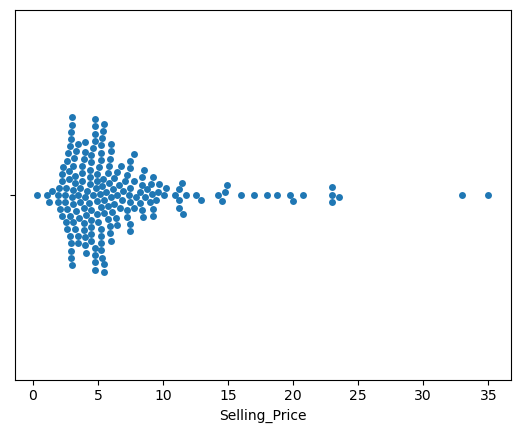

In [28]:
plt.hist(cars.Present_Price)
plt.xlabel("Present Price")
plt.ylabel("Number of cars")
plt.show()

sns.swarmplot(x = cars.Selling_Price)